<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático  
## Taller 03 - Agrupamiento Jerárquico

---

**Nombre:** Nicolás Nolivos  
**Materia:** Aprendizaje Automático
**Fecha:** Abril 2025

---



<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [18]:
# Paquetes necesarios
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

#### Carga del Archivo

In [2]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


#### Descripción de los datos

A continuación se detallan las variables seleccionadas del conjunto de datos, considerando su relevancia para el análisis de **agrupamiento de transacciones**. Estas variables aportan información sobre el comportamiento, contexto y características de cada transacción, facilitando la detección de patrones o segmentos de interés.

| 🏷️ Columna | 📖 Descripción |
|------------|----------------|
| **TransactionAmount** | Valor monetario de la transacción. Ayuda a identificar comportamientos de gasto. |
| **TransactionType** | Tipo de transacción, ya sea 'Credit' o 'Debit'. Permite distinguir el flujo de dinero. |
| **Location** | Ciudad en EE. UU. donde ocurrió la transacción. Útil para agrupar por comportamiento geográfico. |
| **DeviceID** | Identificador del dispositivo usado. Aporta trazabilidad y puede reflejar hábitos tecnológicos. |
| **MerchantID** | ID único del comerciante involucrado. Permite analizar relaciones comerciales o preferencias. |
| **Channel** | Canal de la transacción (Online, ATM, Sucursal). Importante para segmentar por modo de operación. |
| **CustomerAge** | Edad del cliente. Relevante para segmentación demográfica. |
| **CustomerOccupation** | Ocupación del cliente. Puede influir en patrones de consumo. |
| **TransactionDuration** | Duración de la transacción. Puede reflejar eficiencia o anomalías. |
| **LoginAttempts** | Número de intentos de inicio de sesión previos. Útil para detectar comportamientos inusuales. |
| **AccountBalance** | Saldo de la cuenta al momento de la transacción. Ayuda a comprender la capacidad financiera. |
| **TransactionHour** | Hora en la que se realizó la transacción. Permite detectar hábitos temporales. |
| **TransactionWeekday** | Día de la semana. Puede revelar tendencias según el calendario semanal. |
| **TransactionDay** | Día del mes. Útil para identificar patrones cíclicos dentro del mes. |
| **TransactionMonth** | Mes en que ocurrió la transacción. Ayuda a identificar estacionalidades. |
| **PreviousTransactionDate** | Fecha de la transacción anterior del mismo cliente. Útil para medir frecuencia. |



In [3]:
# 📊 Exploración inicial del DataFrame

print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Tipos de Datos por Columna:\n")
print(df.dtypes)

print("\n🔹 Valores Nulos por Columna:\n")
print(df.isnull().sum())

print("\n🔹 Primeras Filas del DataFrame:\n")
print(df.head())

print("\n🔹 Estadísticos Descriptivos:\n")
print(df.describe())


🔹 Dimensión del DataFrame: (2512, 16)

🔹 Tipos de Datos por Columna:

TransactionAmount          float64
TransactionType             object
Location                    object
DeviceID                    object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
TransactionHour              int64
TransactionWeekday           int64
TransactionDay               int64
TransactionMonth             int64
PreviousTransactionDate     object
dtype: object

🔹 Valores Nulos por Columna:

TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
Transa

In [4]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance',
    'TransactionHour',
    'TransactionWeekday',
    'TransactionDay',
    'TransactionMonth'
    ]

cat_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
    ]

total_cols=numeric_cols+cat_cols

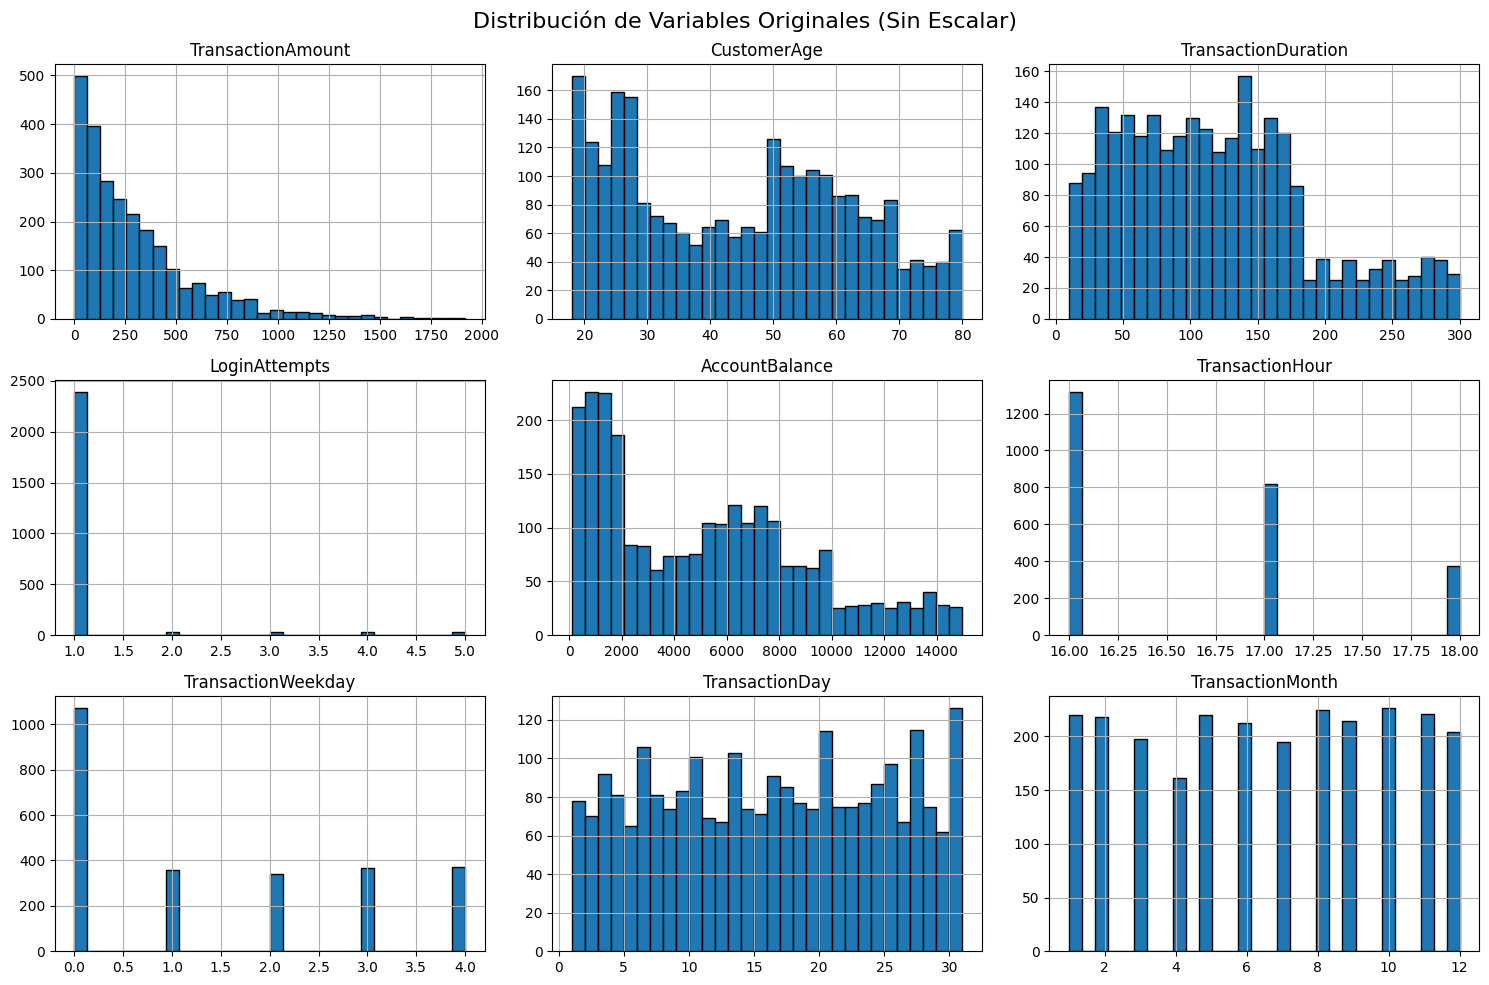

In [5]:
# Gráficos exploratorios
df[numeric_cols].hist(
    figsize=(15, 10),
    bins=30,
    edgecolor='black'
)
plt.suptitle("Distribución de Variables Originales (Sin Escalar)", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


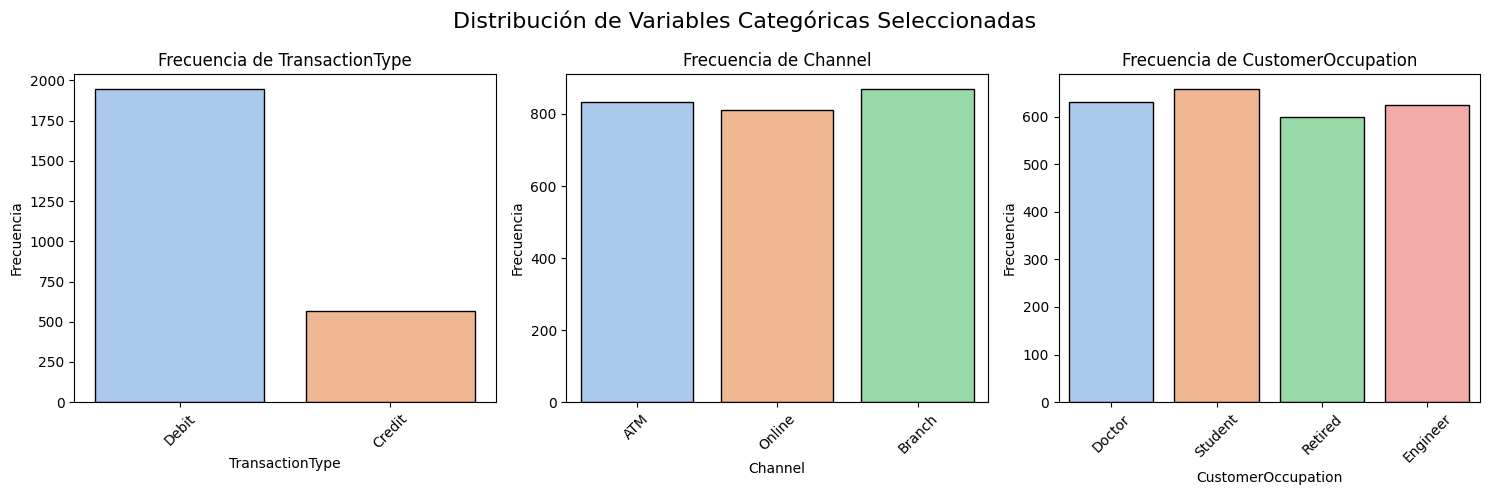

In [6]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

#### Esacalar Datos

In [7]:
# Escalar columnas numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_cols])

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat_encoded = encoder.fit_transform(df[cat_cols])

# Crear nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_names, index=df.index)

# Combinar numéricas escaladas + categóricas codificadas
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# DataFrame final para explorar visualmente
df_cluster_ready = pd.DataFrame(X_final, columns=[*numeric_cols, *encoded_cat_names])

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

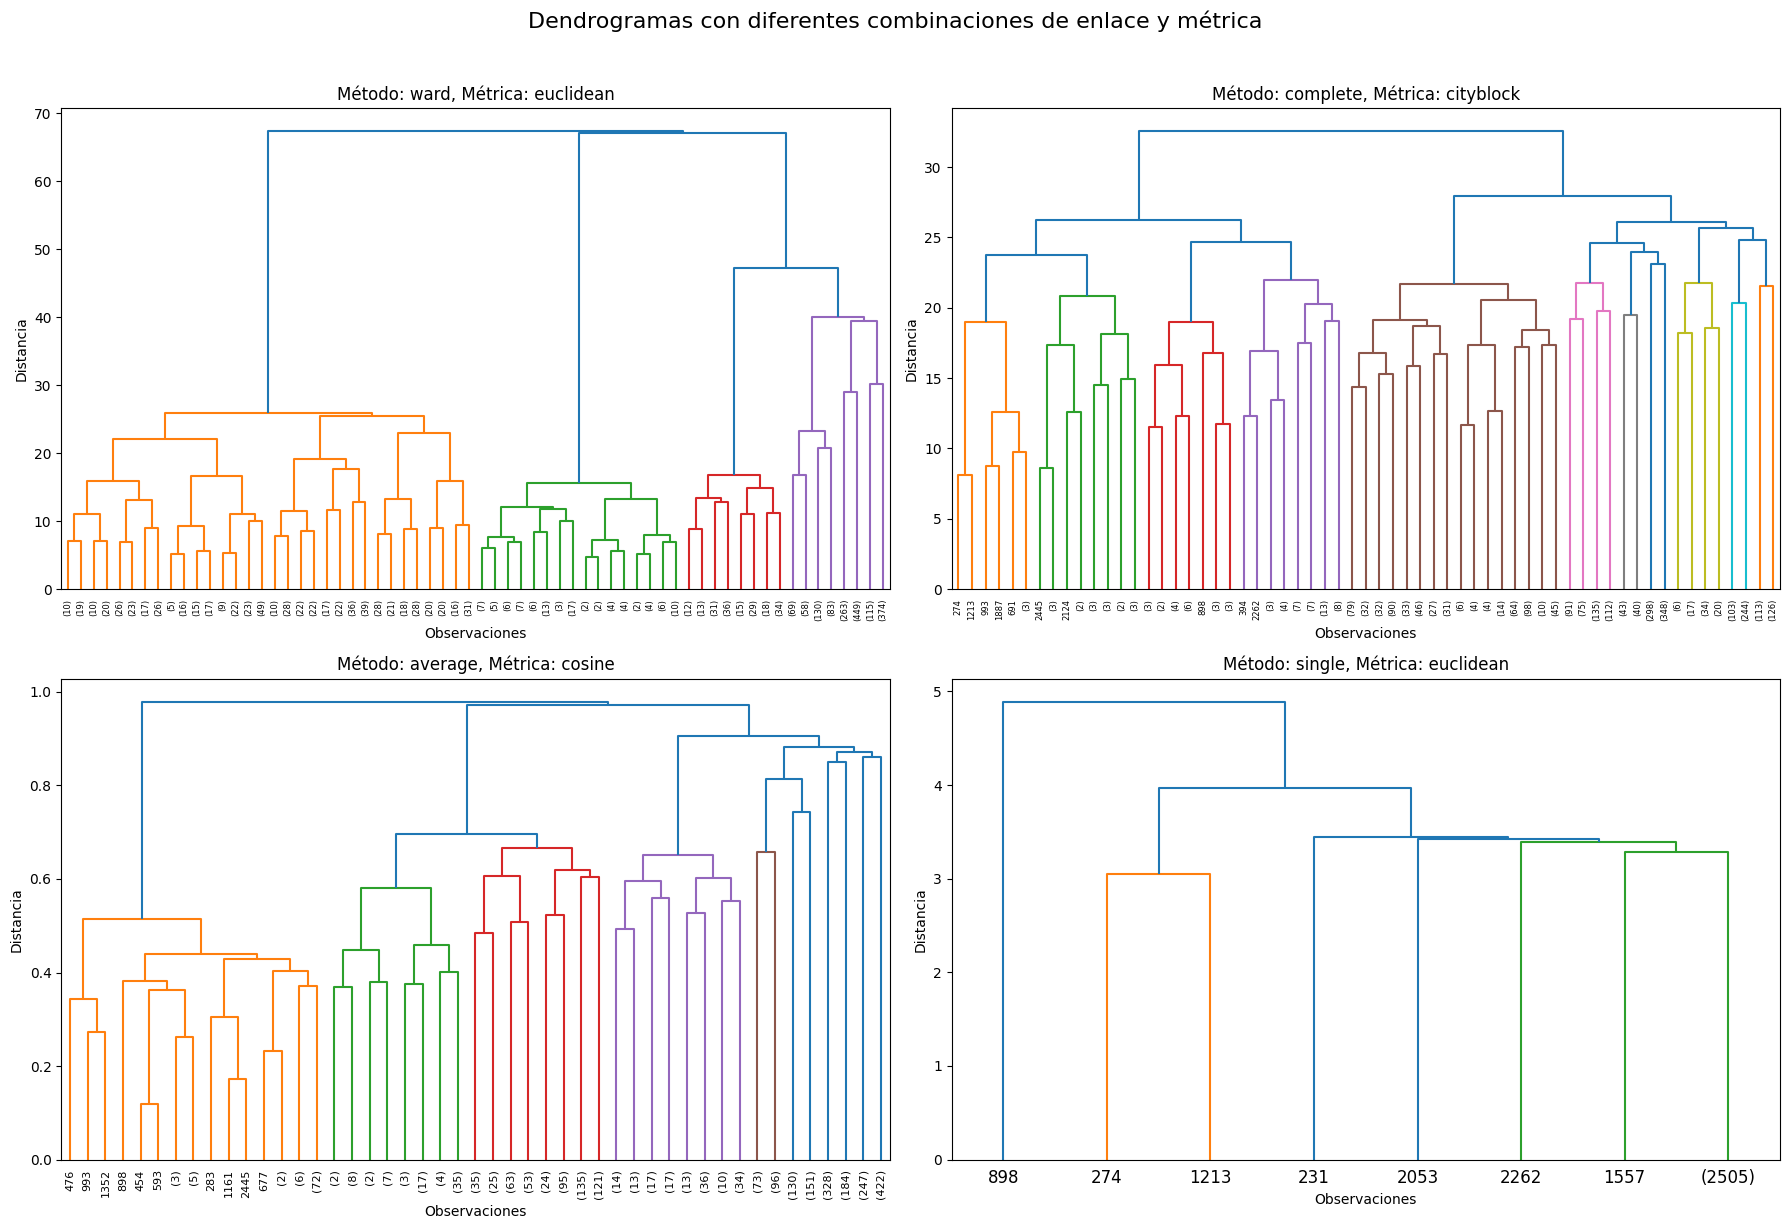

In [12]:
# Datos listos
X = df_cluster_ready.values

# Lista de combinaciones: (linkage_method, metric)
combinations = [
    ('ward', 'euclidean'),
    ('complete', 'cityblock'),
    ('average', 'cosine'),
    ('single', 'euclidean')
]

plt.figure(figsize=(18, 12))

for i, (method, metric) in enumerate(combinations):
    plt.subplot(2, 2, i + 1)
    Z = linkage(X, method=method, metric=metric)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Método: {method}, Métrica: {metric}')
    plt.xlabel('Observaciones')
    plt.ylabel('Distancia')

plt.suptitle("Dendrogramas con diferentes combinaciones de enlace y métrica", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Se eligió la combinación **`ward + euclidean`** para el agrupamiento jerárquico debido a que este método minimiza la **varianza intra-cluster**, generando grupos más compactos y homogéneos, lo cual es especialmente útil cuando los datos han sido previamente escalados y combinados con variables categóricas codificadas. La métrica `euclidean` es obligatoria al usar `ward`, y es adecuada para este tipo de datos numéricos. Visualmente, el dendrograma generado con esta combinación muestra un **salto claro y abrupto en la distancia entre fusiones** a partir de un valor cercano a **35**, lo que indica una buena zona de corte. Esta distancia permite capturar la estructura natural de los datos, formando entre **4 y 6 clusters bien definidos** antes de que se unan grupos claramente disímiles.


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [13]:
# Calcular linkage con ward + euclidean
Z = linkage(df_cluster_ready.values, method='ward', metric='euclidean')

# Asignar clusters con corte a distancia 35
cut_distance = 35
clusters = fcluster(Z, t=cut_distance, criterion='distance')

# Agregar la asignación de cluster al Df
df['Cluster'] = clusters

# Análisis estadístico por grupo
grouped = df.groupby('Cluster')

print("🔹 Media por grupo:")
display(grouped.mean(numeric_only=True))

print("\n🔹 Mínimo por grupo:")
display(grouped.min(numeric_only=True))

print("\n🔹 Máximo por grupo:")
display(grouped.max(numeric_only=True))

# Paso 4: Mostrar ejemplos de cada grupo (primeras 5 filas por grupo)
print("\n🔹 Ejemplos por grupo:")
for cluster_id, group in grouped:
    print(f"\nGrupo {cluster_id} (total: {len(group)} observaciones):")
    display(group.head(5))

🔹 Media por grupo:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
Cluster,,,,,,,,,
1,275.550686,25.811679,123.322628,1.008759,1693.800569,16.613139,1.345985,15.408759,6.446715
2,273.632857,44.153061,128.908163,3.948980,5331.179898,16.704082,1.581633,13.826531,6.622449
3,950.700266,47.186170,125.335106,1.010638,5036.932500,16.648936,1.095745,17.361702,7.569149
4,245.969912,50.191176,128.573529,1.011765,10737.588765,16.520588,1.688235,13.191176,5.947059
5,217.602360,55.255618,121.908708,1.008427,5473.023188,16.448034,0.676966,17.377809,6.004213
6,234.546074,50.991820,100.936605,1.012270,5459.926442,16.952965,2.656442,15.799591,7.566462



🔹 Mínimo por grupo:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
Cluster,,,,,,,,,
1,0.26,18,10,1,101.25,16,0,1,1
2,1.93,18,11,2,271.78,16,0,1,1
3,222.39,18,10,1,151.28,16,0,1,1
4,3.42,18,10,1,1272.12,16,0,1,1
5,0.84,18,10,1,135.96,16,0,1,1
6,0.32,18,10,1,173.70,16,0,1,1



🔹 Máximo por grupo:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
Cluster,,,,,,,,,
1,1309.79,62,299,2,9834.00,18,4,31,12
2,1531.31,80,291,5,14851.28,18,4,31,12
3,1919.11,80,300,2,14576.47,18,4,31,12
4,1162.42,70,300,2,14977.99,18,4,31,12
5,953.17,80,298,2,14510.80,18,4,31,12
6,890.24,80,296,2,14466.38,18,4,31,12



🔹 Ejemplos por grupo:

Grupo 1 (total: 685 observaciones):


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04,1
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06,1
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39,1
5,92.15,Debit,Oklahoma City,D000579,M054,ATM,18,Student,172,1,781.68,17,0,3,4,2024-11-04 08:06:36,1
11,190.02,Debit,Memphis,D000589,M030,Online,21,Student,173,1,1528.81,17,0,6,2,2024-11-04 08:07:12,1



Grupo 2 (total: 98 observaciones):


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
23,345.84,Debit,Fort Worth,D000162,M083,Online,22,Student,142,3,1402.50,18,1,2,5,2024-11-04 08:07:04,2
26,246.93,Debit,Miami,D000046,M029,ATM,23,Student,158,5,673.35,16,0,17,4,2024-11-04 08:11:38,2
32,396.45,Debit,New York,D000621,M007,ATM,49,Engineer,168,3,9690.15,16,0,25,9,2024-11-04 08:11:13,2
91,223.85,Debit,Kansas City,D000481,M009,ATM,53,Engineer,55,4,2929.91,16,0,2,10,2024-11-04 08:08:01,2
147,514.95,Debit,New York,D000109,M056,Online,41,Doctor,142,5,421.93,18,3,13,4,2024-11-04 08:10:01,2



Grupo 3 (total: 188 observaciones):


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
9,815.96,Debit,Nashville,D000199,M007,ATM,55,Doctor,120,1,1021.88,16,4,31,3,2024-11-04 08:06:32,3
82,922.55,Debit,Detroit,D000206,M004,ATM,63,Retired,87,1,4715.84,16,0,23,1,2024-11-04 08:11:07,3
85,1340.19,Credit,Austin,D000574,M012,Online,54,Engineer,30,1,8654.28,17,4,29,9,2024-11-04 08:06:53,3
110,1045.22,Debit,Columbus,D000400,M077,ATM,53,Retired,73,1,1829.90,16,2,22,11,2024-11-04 08:07:35,3
126,598.81,Debit,Philadelphia,D000042,M081,Branch,57,Doctor,158,1,1415.52,16,0,4,9,2024-11-04 08:10:13,3



Grupo 4 (total: 340 observaciones):


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08,4
6,7.08,Credit,Seattle,D000241,M019,ATM,37,Doctor,139,1,13316.71,16,2,15,2,2024-11-04 08:10:09,4
21,85.77,Debit,Las Vegas,D000268,M065,Branch,38,Doctor,93,1,9146.19,18,4,11,8,2024-11-04 08:08:13,4
31,59.12,Debit,Baltimore,D000282,M053,ATM,29,Doctor,257,1,9823.64,16,0,6,2,2024-11-04 08:06:58,4
34,255.26,Credit,San Francisco,D000357,M002,Branch,45,Doctor,50,1,14815.87,16,4,27,10,2024-11-04 08:10:51,4



Grupo 5 (total: 712 observaciones):


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35,5
7,171.42,Credit,Indianapolis,D000500,M020,Branch,67,Retired,291,1,2796.24,17,0,8,5,2024-11-04 08:10:55,5
8,106.23,Credit,Detroit,D000690,M035,Branch,51,Engineer,86,1,9095.14,16,1,21,3,2024-11-04 08:11:14,5
10,17.78,Credit,Albuquerque,D000205,M073,Online,52,Engineer,59,1,7599.52,16,1,14,3,2024-11-04 08:06:45,5
18,18.68,Credit,Albuquerque,D000530,M054,Branch,59,Retired,106,1,7948.37,16,1,21,2,2024-11-04 08:12:01,5



Grupo 6 (total: 489 observaciones):


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
17,492.93,Debit,Columbus,D000432,M059,Online,39,Engineer,234,1,5109.97,18,3,14,12,2024-11-04 08:11:51,6
22,52.20,Debit,Atlanta,D000142,M022,Online,39,Engineer,120,1,8974.93,18,1,6,6,2024-11-04 08:07:01,6
25,7.49,Credit,Houston,D000671,M043,Online,65,Retired,276,1,3634.67,17,4,20,10,2024-11-04 08:09:44,6
27,40.32,Debit,Milwaukee,D000310,M008,Branch,37,Engineer,95,1,2686.52,16,2,29,3,2024-11-04 08:11:59,6
38,795.31,Debit,Mesa,D000077,M048,ATM,66,Doctor,90,2,7914.88,17,3,12,10,2024-11-04 08:11:17,6


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**Grupo 1 – "Jóvenes Digitales de Bajo Impacto"**  
Usuarios muy jóvenes (edad media ~25 años), en su mayoría estudiantes, que realizan transacciones de montos bajos y también tienen saldos bajos. Su canal principal es **Online**, con casi ningún intento fallido de acceso. Representan un grupo de bajo riesgo y actividad financiera reducida.

**Grupo 2 – "Usuarios con Acceso Sospechoso"**  
Grupo pequeño con usuarios de edades variadas, pero que presentan un **número elevado de intentos de login (media ~4)**. Usan tanto **ATM como canales digitales**, y aunque los montos son intermedios, los patrones de acceso podrían indicar comportamiento anómalo o vulnerabilidad. Grupo clave para monitoreo antifraude.

**Grupo 3 – "Clientes Premium Activos"**  
Usuarios de edad media-alta (~47 años), con **transacciones de alto valor (media ~$950)** y saldos bancarios elevados. Mezcla de ocupaciones como doctores, ingenieros y retirados. Este grupo representa a clientes de alto valor económico para la entidad.

**Grupo 4 – "Doctores Tradicionalistas"**  
Grupo maduro (edad media ~50), dominado por **doctores**, con montos bajos o moderados pero **altos saldos disponibles (media ~$10,700)**. Su uso se concentra en **ATM y canales presenciales**, indicando menor adopción digital. Son conservadores en su gestión financiera.

**Grupo 5 – "Adultos Estables y Diversificados"**  
Usuarios mayores (edad media ~55), con ocupaciones como **retirados e ingenieros**, montos intermedios y saldos altos. Uso equilibrado de canales y comportamiento muy estable. Este grupo representa una base sólida y confiable de clientes con poder adquisitivo medio-alto.

**Grupo 6 – "Profesionales Tecnológicos Diversificados"**  
Clientes entre 40 y 55 años, con variedad de ocupaciones (Muchos ingenieros y doctores), saldo alto y transacciones variadas. Utilizan tanto canales digitales como presenciales. Son usuarios **versátiles**, probablemente activos laboralmente, con confianza en medios electrónicos.



---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

#### Gráfico con PCA (2 Componentes)

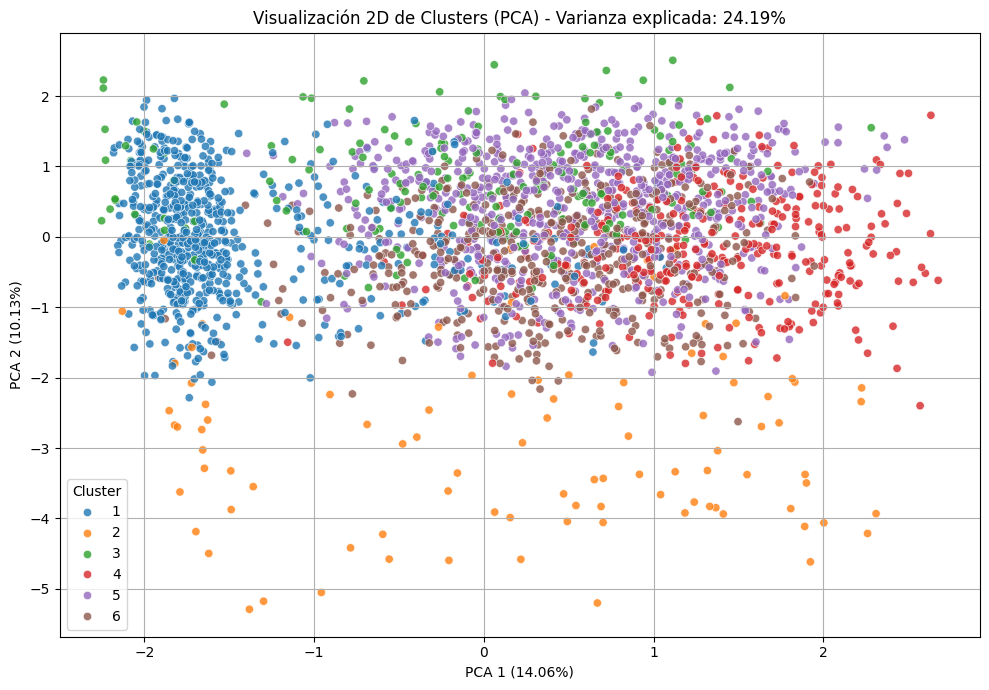

In [15]:
# Aseguramos que usamos los datos finales (numéricas + categóricas codificadas)
X = df_cluster_ready.values
y = df['Cluster']

# Aplicar PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Varianza explicada
explained_var = pca.explained_variance_ratio_
total_explained = explained_var.sum()

# Crear DataFrame con componentes y cluster
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': y
})

# Visualizar con seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.8)
plt.title(f'Visualización 2D de Clusters (PCA) - Varianza explicada: {total_explained:.2%}')
plt.xlabel(f'PCA 1 ({explained_var[0]:.2%})')
plt.ylabel(f'PCA 2 ({explained_var[1]:.2%})')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Gráfico con t-SNE (2 Componentes)

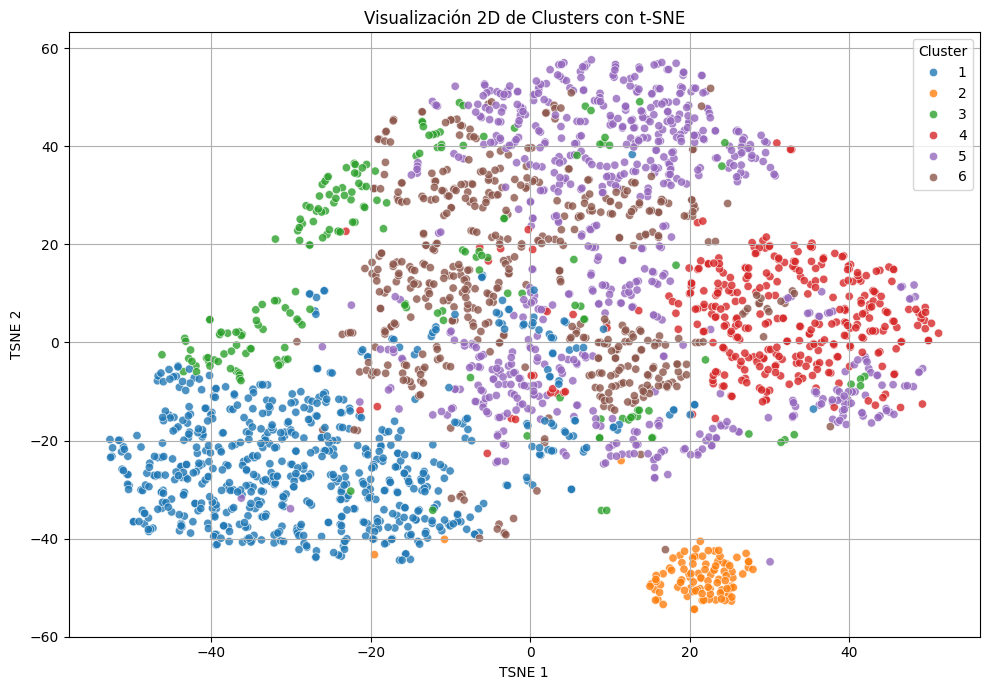

In [17]:
# Usamos los datos finales (numéricas + categóricas codificadas)
X = df_cluster_ready.values
y = df['Cluster']

# Aplicar t-SNE a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Crear DataFrame con coordenadas t-SNE y cluster
df_tsne = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Cluster': y
})

# Graficar
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', alpha=0.8)
plt.title('Visualización 2D de Clusters con t-SNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Análisis


Desde mi análisis, considero que los grupos obtenidos mediante el clustering jerárquico son adecuados, especialmente al observar su distribución en la visualización realizada con t-SNE. En esta proyección, se evidencian agrupaciones bien definidas, con fronteras relativamente claras, lo que sugiere que el modelo logró identificar estructuras coherentes en los datos. En contraste, la visualización basada en PCA muestra una mayor superposición entre grupos, lo que dificulta la interpretación visual. Este comportamiento es comprensible si se considera que los dos primeros componentes principales explican únicamente el 24.19% de la varianza total (14.06% en el primer componente y 10.13% en el segundo). Este bajo porcentaje afecta la capacidad de la visualización para reflejar con fidelidad la separación real entre clusters, lo que limita su utilidad interpretativa. Por esta razón, t-SNE es una técnica más apropiada en este contexto, ya que permite una representación más intuitiva de las relaciones locales entre observaciones, sin depender de la varianza explicada.


---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [19]:
# Usamos los datos con los que se hizo el clustering
X = df_cluster_ready.values
labels = df['Cluster']

# Calcular la puntuación de silueta
sil_score = silhouette_score(X, labels)

print(f"Métrica de Silueta para los grupos obtenidos: {sil_score:.4f}")

Métrica de Silueta para los grupos obtenidos: 0.0764


La métrica de silueta calculada para los grupos obtenidos fue de **0.0764**, lo cual indica que los clusters tienen una **estructura débilmente definida**. Este valor sugiere que, aunque existen algunas diferencias entre los grupos, la separación entre ellos no es lo suficientemente clara como para considerarlos completamente compactos o bien delimitados. En comparación con la visualización por t-SNE —donde algunos clusters sí mostraban buena separación visual—, esta métrica ofrece una perspectiva más cuantitativa que advierte sobre posibles **solapamientos o ambigüedad en las asignaciones**. Por tanto, si bien el modelo produce una segmentación razonable a nivel visual, sería recomendable explorar ajustes como la selección de nuevas variables, reducción de ruido o técnicas alternativas de agrupamiento para mejorar la cohesión interna de los grupos.


---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [25]:
# Datos
X = df_cluster_ready.values

# Combinaciones válidas de método + métrica
combinations = [
    ('ward', 'euclidean'),
    ('complete', 'euclidean'),
    ('complete', 'cityblock'),
    ('average', 'euclidean'),
    ('average', 'cosine'),
    ('single', 'euclidean')
]

# Rango de clusters a evaluar
cluster_range = range(3, 11)

results = []

for method, metric in combinations:
    # Ward solo permite euclidean
    if method == 'ward' and metric != 'euclidean':
        continue

    try:
        # Linkage
        Z = linkage(X, method=method, metric=metric)

        for k in cluster_range:
            labels = fcluster(Z, t=k, criterion='maxclust')
            sil = silhouette_score(X, labels)
            results.append({
                'method': method,
                'metric': metric,
                'n_clusters': k,
                'silhouette_score': sil
            })
    except Exception as e:
        print(f"Error con {method} + {metric}: {e}")

# Convertir a DataFrame y ordenar
results_df = pd.DataFrame(results)
best_result = results_df.sort_values(by='silhouette_score', ascending=False).iloc[0]

# Mostrar tabla ordenada
display(results_df.sort_values(by='silhouette_score', ascending=False))
print(f"\n🔝 Mejor combinación: método = {best_result.method}, métrica = {best_result.metric}, clusters = {best_result.n_clusters}, silueta = {best_result.silhouette_score:.4f}")


,method,metric,n_clusters,silhouette_score
40,single,euclidean,3,0.415417
24,average,euclidean,3,0.294959
25,average,euclidean,4,0.288393
26,average,euclidean,5,0.286899
27,average,euclidean,6,0.271881
41,single,euclidean,4,0.241677
42,single,euclidean,5,0.233251
45,single,euclidean,8,0.230215
43,single,euclidean,6,0.230189
44,single,euclidean,7,0.230019



🔝 Mejor combinación: método = single, métrica = euclidean, clusters = 3, silueta = 0.4154


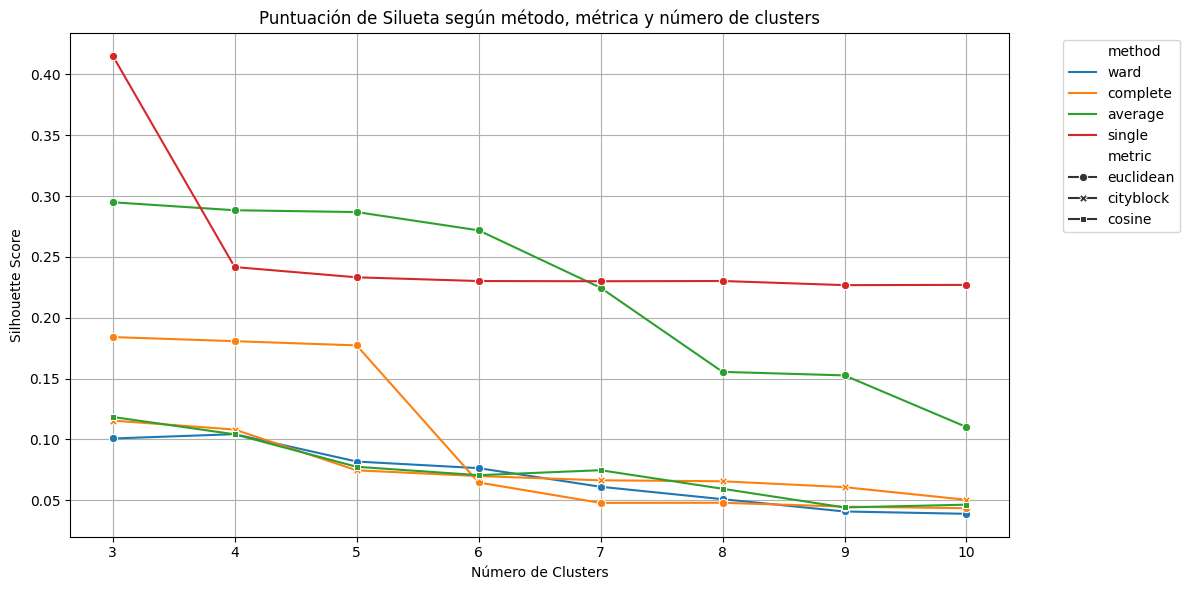

In [26]:
# Gráfico de las iteraciones
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='n_clusters', y='silhouette_score', hue='method', style='metric', markers=True, dashes=False)
plt.title('Puntuación de Silueta según método, métrica y número de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se evaluaron múltiples combinaciones de métodos de enlace, métricas de distancia y diferentes números de clusters para el agrupamiento jerárquico, utilizando como criterio de comparación la métrica de silueta. Los resultados muestran que la mejor configuración fue obtenida con el método **`single`**, métrica **`euclidean`** y **3 clusters**, alcanzando una puntuación de silueta de **0.4154**, lo que indica una **buena cohesión interna y separación entre grupos**. Esta combinación superó con claridad al resto, incluyendo configuraciones tradicionalmente robustas como `average + euclidean` (máximo de 0.2949 con 3 clusters) o `complete + euclidean` (0.1841 con 3 clusters). A medida que se incrementa el número de clusters, en casi todas las combinaciones se observa una disminución progresiva en la calidad del agrupamiento, evidenciada por la caída de la silueta. Esto sugiere que en este caso, un modelo con **menos grupos pero más consistentes** produce una segmentación más efectiva. En conclusión, el análisis demuestra que no siempre las configuraciones más comunes (como `ward`) son las más óptimas, y resalta la importancia de evaluar distintas variantes para identificar la estructura más coherente en los datos.
